In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.image as img
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
def load_image_vector(path):
    image =  Image.open(path).convert('L') # Image to grayscale
    matrix = np.array(image).astype(int)
    print(matrix.shape)
    column_vector = matrix.flatten()
    return column_vector

def load_images(path):
    images = []
    for fname in os.listdir(path):
        images.append(load_image_vector('/'.join([path, fname])))
        print(fname)
    return np.array(images)

def compute_mean_vector(vectors):
    return sum(vectors)/len(vectors)

def vec_to_img(vec):
    return Image.fromarray(np.reshape(vec, (126, 88))).convert('RGB')

In [3]:
photos_path = './data/train'

In [4]:
image_vectors = load_images(photos_path)

(126, 88)
1.jpg
(126, 88)
2.jpg


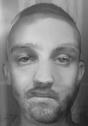

In [5]:
mean_face = compute_mean_vector(image_vectors)
mean_face_matrix = np.reshape(mean_face, (126, 88))
mean_face_image = Image.fromarray(mean_face_matrix).convert('RGB')
mean_face_image

In [6]:
residual_vectors = np.array([f - mean_face for f in image_vectors]).T
rank = np.linalg.matrix_rank(residual_vectors)
residual_vectors.shape, rank

((11088, 2), 1)

In [45]:
u, s, vh = np.linalg.svd(residual_vectors, full_matrices=True)
face_basis = u
face_basis

array([[-5.15719212e-04,  9.75847563e-01,  1.60920122e-03, ...,
        -2.31315679e-05, -1.15657839e-05,  5.78289196e-06],
       [-1.13458227e-03,  9.20297261e-06, -6.19175774e-03, ...,
        -3.99082838e-04, -1.99541419e-04,  9.97707094e-05],
       [-4.43518522e-03, -1.86774879e-03,  9.99968815e-01, ...,
        -2.57142059e-06, -1.28571029e-06,  6.42855146e-07],
       ...,
       [-4.12575370e-04,  3.34653549e-06, -1.80530611e-06, ...,
         9.99999831e-01, -8.43051026e-08,  4.21525513e-08],
       [-2.06287685e-04,  1.67326775e-06, -9.02653055e-07, ...,
        -8.43051026e-08,  9.99999958e-01,  2.10762756e-08],
       [ 1.03143842e-04, -8.36633873e-07,  4.51326527e-07, ...,
         4.21525513e-08,  2.10762756e-08,  9.99999989e-01]])

Base faces


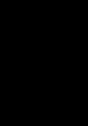

In [46]:
print('Base faces')
vec_to_img(face_basis[0, :])

In [47]:
def scalar_projection(vector, mean_vector, basis):
    return basis.T.dot((vector - mean_vector))

In [48]:
train_projections = np.array([scalar_projection(im, mean_face, face_basis) for im in residual_vectors.T])
train_projections.shape

(2, 11088)

In [49]:
test_faces_path = './data/test'
test_face = load_image_vector(f'{test_faces_path}/1.jpg')
test_face.shape

(126, 88)


(11088,)

In [50]:
test_face_projection = scalar_projection(test_face, mean_face, face_basis)
test_face_projection.shape

(11088,)

In [51]:
def norm_2(v1, v2):
    return np.sqrt((v1-v2).T.dot(v1-v2))

def distance_from_face_space(v1, mean_face, basis):
    fp = basis.dot(v1)
    return norm_2(v1-mean_face, fp)
    
def distance_in_face_space(v1, v2):
    return norm_2(v1, v2)
    

In [53]:
print('Distance from face space', distance_from_face_space(test_face_projection, mean_face, face_basis))
for i, im in enumerate(train_projections):
    prj = scalar_projection(im, mean_face, face_basis)
    print(i, distance_in_face_space(im, prj))

Distance from face space 14642.3828038537
0 12906.005322389889
1 18374.761280345043
